In [1]:
import numpy as np

import ND_path_finder.src.path_finders.voronoi as VOR

from ND_path_finder.src.data_generators.perlin_generator import PerlinNoiseGenerator
from ND_path_finder.src.data_samplers.random_sampler import sample_xarray
from ND_path_finder.src.edge_detection.SVM_2D_contour import svm_boundary_2D
from ND_path_finder.src.path_finders.voronoi import compute_sink_vertices, voronoi_points

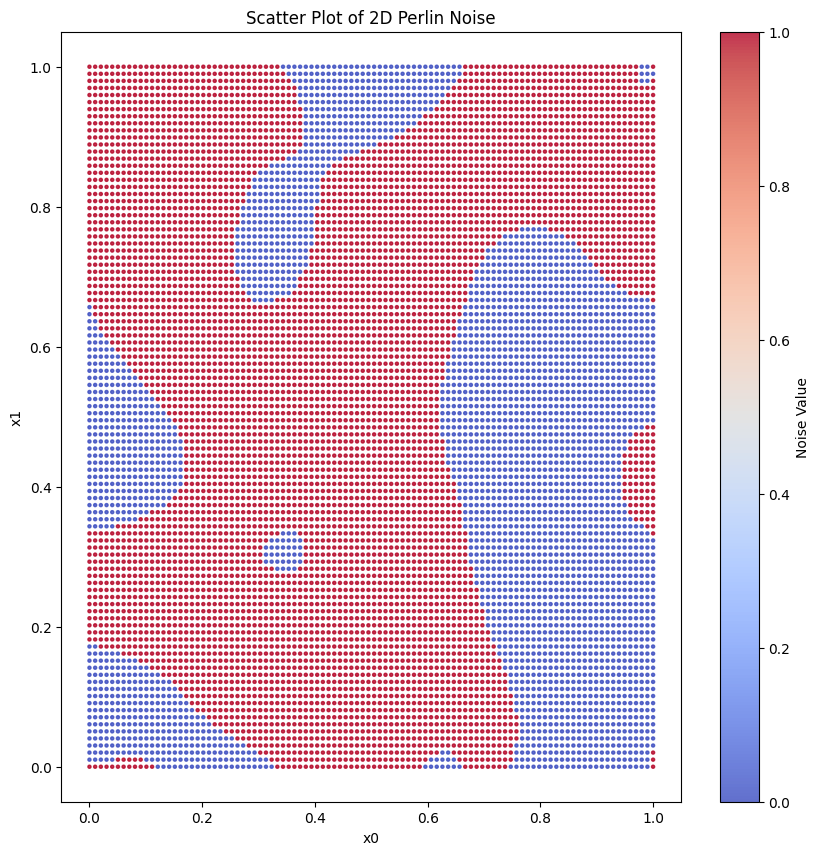

In [2]:
generator_2D = PerlinNoiseGenerator(res=[100, 100], octv=3, seed=42, time_test=False)

xdataset_2D = generator_2D.perlin_data_xarray()

generator_2D.plot_2D_xarray()


Best parameters: {'C': 100, 'gamma': 50}


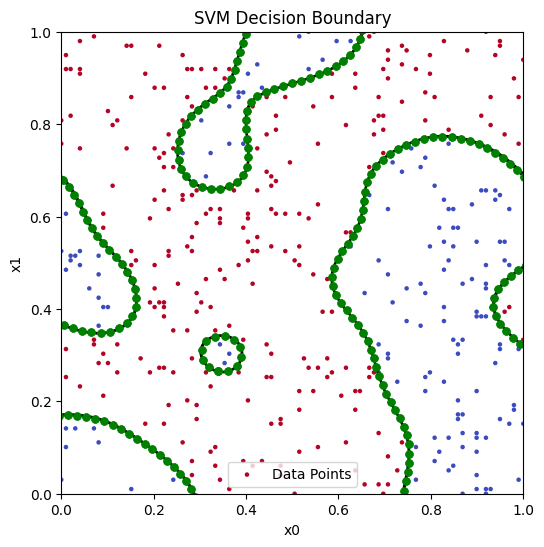

In [3]:
boundary_points, gradients = svm_boundary_2D(sample_xarray(xdataset_2D, 400), boundary_resolution_len=0.02, plot=True)

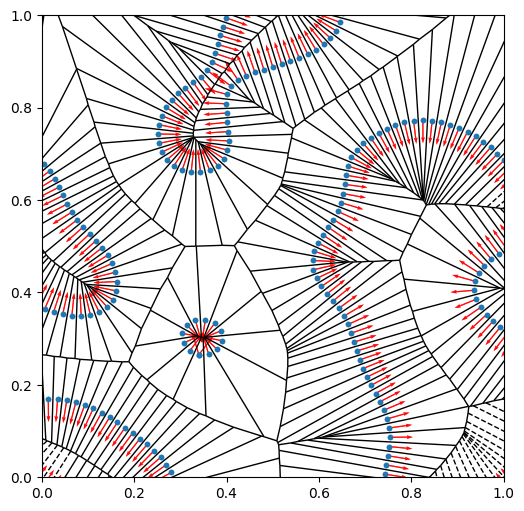

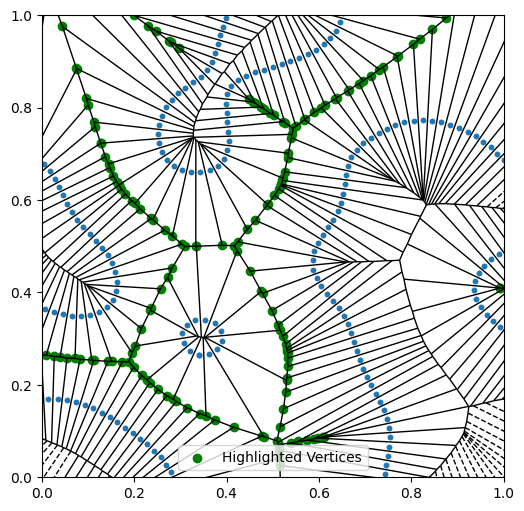

In [4]:
vor = voronoi_points(boundary_points, gradients, plot=True)
midpath_coords = compute_sink_vertices(boundary_points, gradients, plot=True)

In [5]:
assert vor is not None
assert midpath_coords is not None
assert midpath_coords.shape[1] == 2

assert midpath_coords.shape[1] == 2
print(midpath_coords.shape)

assert np.all(np.isfinite(midpath_coords))

(154, 2)
